In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

In [2]:
d=loadmat("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex3data1.mat")

In [9]:
d.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
weights= loadmat("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex3weights.mat")

In [5]:
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [17]:
x= np.c_[np.ones((d['X'].shape[0],1)), d['X']]

In [7]:
x.shape

(5000, 401)

In [122]:
y=d['y']

In [123]:
y.shape

(5000, 1)

In [126]:
y=y.ravel()
y.shape

(5000,)

In [16]:
theta1, theta2= weights['Theta1'], weights['Theta2']

In [38]:
theta1.shape, theta2.shape

((25, 401), (10, 26))

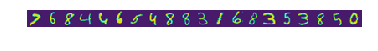

In [25]:
sample = np.random.choice(x.shape[0], 20)
plt.imshow(x[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [40]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [45]:
def cost_func(theta, reg, x, y):
    m=len(y)
    h=sigmoid(x.dot(theta))
    cost= ((-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m)) + ((np.sum(theta[1:]**2))*(reg/(2*m)))
    return cost[0]

In [44]:
def grad_desc(theta,reg,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta.reshape(-1,1)))
    grad= (x.T.dot(h-y)*(1/m)) +(reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad.flatten()

In [46]:
def oneVsAll(x, y,labels, reg):
    initial_theta = np.zeros((x.shape[1],1))  # 401x1
    all_theta = np.zeros((labels, x.shape[1])) #10x401

    for c in np.arange(1, labels+1):
        param = minimize(cost_func,initial_theta, args=(reg, x, (y == c)*1), method=None,jac=grad_desc, options={'maxiter':50})
        
        all_theta[c-1] = param.x
        
    return(all_theta)

In [42]:
theta = oneVsAll(x, y, 10, 0.1)

In [43]:
theta.shape

(10, 401)

In [57]:
def predictOneVsAll(all_theta, features):
    probs = sigmoid(x.dot(all_theta.T))
        
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs, axis=1)+1)

In [127]:
pred = predictOneVsAll(theta, x)
print('Accuracy: ', np.mean(pred == y)*100)

Accuracy:  93.24


### Multiclass Logistic Regression using Scikit learn

In [103]:
mlr = LogisticRegression(C=1, solver= 'liblinear')

In [104]:
xx= np.asarray(d['X'])
yy=y.ravel()

In [105]:
mlr.fit(xx, yy)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
preds =mlr.predict(xx)

In [107]:
print("Accuracy:", np.mean(yy==preds)*100)

Accuracy: 94.38


### Neural Networks

In [112]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((d['X'].shape[0],1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
        
    return(np.argmax(a3, axis=1)+1) 

In [128]:
pred = predict(theta1, theta2, x)
print("Training Accuracy: ", (np.mean(pred == y)*100))

Training Accuracy:  97.52


### Neural Networks using Scikit Learn

In [114]:
from sklearn.neural_network import MLPClassifier

In [115]:
#25 units in 1st layer, 10 unit in 2nd layer

nn= MLPClassifier(hidden_layer_sizes=(25,10),activation='logistic')

In [116]:
nn.fit(xx,yy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [120]:
predict_n=nn.predict(xx)

In [130]:
print("Training Accuracy: ", (np.mean(predict_n == y)*100))

Training Accuracy:  98.3
